<a href="https://colab.research.google.com/github/sharmarahulraj03/FinancialFraudClustering-/blob/main/Financial_Fraud_detection_clustering_Using_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1 align="center"><b>Intelligent Fraud Detection in Financial Statements using 
DBSCAN Anomaly Detection   
</b></H1>
<H5 align="center"><b> Research Project Submitted to the Faculty of Engineering in partial fulfillment of the requirements for the degree of
Master of Digital Transformation and Innovation concentration in Applied Data Science
</b></H5>
<H5 align="left"><b><u> Overview:</u></b></H5>
<p align="justify">Fraud in financial statements has become a significant problem for taxpayers, accounting companies, government officials, and other players in the stock market. The objective of this research project is to gather the data from different sources such as SEC EDGAR and COMPUSTAT and then preprocess the data to make it understandable for applying the different anomaly detection techniques such as DBSCAN, Isolation forest and Affinity Propagation to stand out the fraudulent transactions from the financial statements.</p>
<p align="justify">Before implementing the DBSCAN, we need to run the dataset creation code provided in the same GitHub library in order to get the data in the format used in below code. Use COMPUSTAT and SEC EDGAR to get the financial statements before implementing the dataset creation step.
</p>
<H5 align="center"><b>Outlier Detection: DBSCAN </b></h5>
<p align="justify">DBSCAN is a density-based clustering tool, not an outlier identification method in the traditional sense. It uses a distance measure to expand clusters. A cluster is formed by core points (points with the fewest points in their surroundings) and points that are near enough to those core points.<br>
Since points that do not belong to any cluster get their own class, we can use DBSCAN as an outlier detection algorithm: The algorithm has two parameters: epsilon, which is the length scale, and min samples, which is the minimum number of samples needed for a point to be considered a central point. It's crucial to get a strong epsilon.<br>
As a result, DBSCAN makes binary predictions: either a point is an outlier or it isn't. We consider the other clusters apart from the main cluster as outlier clusters to simplify the predictions; the smaller the cluster, the higher the outlier score.<br>
The default Euclidean distance will be used as the distance function. If the neighbourhood scan is a linear scan, as it is in the sci-kit learn implementation, the worst-case output of DBSCAN is O(n2). This greatly reduces the scale of the sample that can be evaluated.<br>
A distance matrix, rather than a matrix of datapoints, can be passed to the algorithm, which can minimise the time complexity. However, no speedup was found, and there was a considerable memory load (despite the sparse matrix), so this is not achieved.</p>

**Importing all the required libraries**

In [ ]:
# Import the dependencies

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
import warnings
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import sklearn.metrics as metrics
from itertools import product
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
pip install product

  Created wheel for product: filename=product-0.1.1.1-cp37-none-any.whl size=1242 sha256=9793cae3952404e2565140eda4572b6ea3edc63be6fd6a8953fcea1792a23f19
  Stored in directory: /root/.cache/pip/wheels/ad/b3/22/c2d57f2ee1008288fdb4f38f396bf8ec3d9aca1606bde323f1
Successfully built product


**Ignoring the Warnings**

In [ ]:
# ignore the warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

**Import dataset**

In [ ]:
# Import data
df = pd.read_excel("Dataset_all_ratios-V1.xlsx")

In [ ]:
# Viewing the imported dataset
df

,Ticker,Year,Label,Current Assets / Current Liabilities,Cash / Current Liabilities,Inventory Turnover,Acid Test (Quick Ratio),Return on Equity / Return on Assets,Total Assets / Common Equity,Avg Tot Assets / Avg Comm Equity,Total Liabilities / Total Assets,Total Debt / Total Assets,Total Liabilities / Common Equity,Total Debt / Common Equity,Preferred Stock / Total Assets,Preferred Stock / Common Equity,Return on Common Equity,Return on Total Assets,Sales / Avg. Total Assets,GROSS PROFIT,Working Capital,Working Capital/Total Assets,Gross Profit/Total Assets,Cash,Cash/Total Assets,Long term debt/Total Assets,Inventories/sales
0,IDEA,2010,1,0.000000,0.000000,nan,0.000000,1.5483,1.497341,nan,0.332149,0.035976,0.497341,0.053869,0.0,0.0,2.04494,1.32076,0.010285,-0.099,-0.314,-0.035976,-0.011343,0.000,0.000000,0.000000,0.000000
1,3BIGTQ,2001,0,0.043144,0.021543,NaN,0.030929,NaN,12.343170,4.05233,0.918984,0.918984,11.343170,11.343170,0.0,0.0,-1.45072,NaN,0.153433,-46.790,-900.651,-0.870755,-0.045237,20.278,0.019605,0.856079,0.000000
2,IDEA,2011,1,0.087302,0.087302,nan,0.087302,1.17393,1.010897,1.17393,0.010779,0.010779,0.010897,0.010897,0.0,0.0,0.602921,0.513592,0.008718,-0.122,-0.115,-0.009838,-0.010437,0.011,0.000941,0.000000,0.000000
3,AUSI,2002,0,0.131503,0.009115,3.40632,0.043631,3.91873,4.143654,3.02505,0.758667,0.758667,3.143654,3.143654,0.0,0.0,-1.85903,-0.474396,0.042033,-9.832,-15.626,-0.657439,-0.413665,0.164,0.006900,0.559786,1.280797
4,GRLL,2000,1,0.156795,0.027905,98.8586,0.094317,3.04953,2.713695,2.28003,0.631499,0.631499,1.713695,1.713695,0.0,0.0,-0.353148,-0.115804,1.641627,15.615,-47.803,-0.476467,0.155640,1.582,0.015768,0.339786,0.008700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,EQS,2014,0,NaN,1.947717,NaN,2.045337,1.44612,1.437474,1.44612,0.304335,0.304335,0.437474,0.437474,0.0,0.0,-0.0393846,-0.0272346,0.019226,-1.818,NaN,NaN,-0.034936,30.846,0.592759,0.000000,0.000000
1778,EQS,2015,0,NaN,2.114440,NaN,2.177178,1.41995,1.408009,1.42252,0.289777,0.289777,0.408009,0.408009,0.0,0.0,0.0301188,0.0212111,0.008530,-2.349,NaN,NaN,-0.044717,32.186,0.612717,0.000000,0.000000
1779,GE,1996,0,NaN,0.041699,7.11457,1.273812,3.82696,7.980839,8.23982,0.874700,0.844329,6.980839,6.738457,0.0,0.0,0.239734,0.0626435,0.313890,22126.000,NaN,NaN,0.081226,4191.000,0.015385,0.062489,0.095059
1780,GE,1997,0,NaN,0.048571,7.27685,1.154938,3.98799,7.975131,8.79176,0.874610,0.846154,6.975131,6.748190,0.0,0.0,0.250233,0.0627465,0.307210,23907.000,NaN,NaN,0.078638,5861.000,0.019279,0.053287,0.116309


In [ ]:
# finding the number of null values in the dataset
df.isna().sum()

Ticker                                    0
Year                                      0
Label                                     0
Current Assets / Current Liabilities      6
Cash / Current Liabilities                0
Inventory Turnover                      222
Acid Test (Quick Ratio)                   1
Return on Equity / Return on Assets     177
Total Assets / Common Equity              0
Avg Tot Assets / Avg Comm Equity         36
Total Liabilities / Total Assets          0
Total Debt / Total Assets                 0
Total Liabilities / Common Equity         0
Total Debt / Common Equity                0
Preferred Stock / Total Assets            0
Preferred Stock / Common Equity           0
Return on Common Equity                  14
Return on Total Assets                  162
Sales / Avg. Total Assets                 0
GROSS PROFIT                              0
Working Capital                           6
Working Capital/Total Assets              6
Gross Profit/Total Assets       

**Dropping the unwanted columns**

In [ ]:
df.drop(columns=["Inventory Turnover", "Return on Common Equity", "Return on Total Assets", "GROSS PROFIT", "Working Capital", "Cash"], axis=1, inplace=True)

In [ ]:
df.drop(columns=["Ticker", "Year", "Label"], axis=1, inplace=True)

In [ ]:
#percentage of null values in each column
df.isna().sum().sort_values(ascending=False)/len(df)

Return on Equity / Return on Assets     0.099327
Avg Tot Assets / Avg Comm Equity        0.020202
Inventories/sales                       0.016274
Long term debt/Total Assets             0.014029
Current Assets / Current Liabilities    0.003367
Working Capital/Total Assets            0.003367
Acid Test (Quick Ratio)                 0.000561
Sales / Avg. Total Assets               0.000000
Preferred Stock / Common Equity         0.000000
Preferred Stock / Total Assets          0.000000
Total Debt / Common Equity              0.000000
Total Debt / Total Assets               0.000000
Total Liabilities / Total Assets        0.000000
Gross Profit/Total Assets               0.000000
Total Assets / Common Equity            0.000000
Cash/Total Assets                       0.000000
Cash / Current Liabilities              0.000000
Total Liabilities / Common Equity       0.000000
dtype: float64

**Imputing the null values using KNN Imputer**

In [ ]:
values = df.values
imputer = KNNImputer(n_neighbors=2, weights="uniform")
transformed_values=imputer.fit_transform(values)

In [ ]:
#printing values after the imputation of null values
print(transformed_values)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.31442501e-02 2.15434401e-02 3.09287222e-02 ... 1.96049048e-02
  8.56079232e-01 0.00000000e+00]
 [8.73015870e-02 8.73015870e-02 8.73015870e-02 ... 9.41055690e-04
  0.00000000e+00 0.00000000e+00]
 ...
 [9.26712869e-01 4.16985882e-02 1.27381177e+00 ... 1.53853496e-02
  6.24885280e-02 9.50586318e-02]
 [1.30896006e+00 4.85712865e-02 1.15493751e+00 ... 1.92788443e-02
  5.32873702e-02 1.16309013e-01]
 [1.30896006e+00 3.04918102e-02 1.15059437e+00 ... 1.21286190e-02
  4.12856280e-02 1.22380285e-01]]


**Scaling the dataset in oder to simplify the data between 0 and 1**

In [ ]:
# Use MinMaxScaler to apply minmaxscaling
ms = MinMaxScaler()
scaled_df1 = ms.fit_transform(transformed_values)
scaled_df1 = pd.DataFrame(scaled_df1)

In [ ]:
#printing the data after scaling 
print(scaled_df1)

            0         1         2   ...        15        16        17
0     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
1     0.000247  0.000126  0.000181  ...  0.020170  1.000000  0.000000
2     0.000500  0.000511  0.000511  ...  0.000968  0.000000  0.000000
3     0.000754  0.000053  0.000255  ...  0.007099  0.653895  0.329880
4     0.000899  0.000163  0.000552  ...  0.016223  0.396909  0.002241
...        ...       ...       ...  ...       ...       ...       ...
1777  0.015292  0.011401  0.011973  ...  0.609851  0.000000  0.000000
1778  0.015292  0.012377  0.012745  ...  0.630384  0.000000  0.000000
1779  0.005311  0.000244  0.007457  ...  0.015829  0.072994  0.024483
1780  0.007501  0.000284  0.006761  ...  0.019835  0.062246  0.029956
1781  0.007501  0.000178  0.006735  ...  0.012478  0.048226  0.031520

[1782 rows x 18 columns]


In [ ]:
scaled_df1.columns = df.columns

In [ ]:
#count of null values column wise
scaled_df1.isna().sum()

Current Assets / Current Liabilities    0
Cash / Current Liabilities              0
Acid Test (Quick Ratio)                 0
Return on Equity / Return on Assets     0
Total Assets / Common Equity            0
Avg Tot Assets / Avg Comm Equity        0
Total Liabilities / Total Assets        0
Total Debt / Total Assets               0
Total Liabilities / Common Equity       0
Total Debt / Common Equity              0
Preferred Stock / Total Assets          0
Preferred Stock / Common Equity         0
Sales / Avg. Total Assets               0
Working Capital/Total Assets            0
Gross Profit/Total Assets               0
Cash/Total Assets                       0
Long term debt/Total Assets             0
Inventories/sales                       0
dtype: int64

**Implementing PCA in order to get the proper components. Here we provided 5 columns to be created**

In [ ]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(scaled_df1)
principalDf = pd.DataFrame(data = principalComponents)

In [ ]:
#printing dataset after the PCA
principalDf

,0,1,2,3,4
0,0.346462,-0.378996,-0.219288,0.096152,-0.031226
1,-0.761199,-0.054907,-0.440367,0.649193,0.251846
2,0.575837,-0.467931,-0.198468,0.121377,-0.014319
3,-0.507654,-0.142217,-0.408404,0.393149,0.178590
4,-0.328164,-0.179133,-0.096658,0.391997,0.075928
...,...,...,...,...,...
1777,0.463047,0.297690,-0.146989,0.028343,-0.012508
1778,0.488801,0.307653,-0.148457,0.037173,-0.011865
1779,-0.527970,0.018441,-0.206547,-0.016852,-0.015783
1780,-0.517291,0.032430,-0.195837,-0.054708,-0.013599


**Graphical representation of the data points before implementing DBSCAN**

In [ ]:
Scene = dict(xaxis = dict(title  = 'PCA_Financial_Ratio_1'),yaxis = dict(title  = 'PCA_Financial_Ratio_2'),zaxis = dict(title  = 'PCA_Financial_Ratio_3'))
trace = go.Scatter3d(x=principalDf.iloc[:,0], y=principalDf.iloc[:,1], z=principalDf.iloc[:,2], mode='markers',marker=dict(colorscale='Greys', opacity=0.3, size = 10, ))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

**Hyper tuning of the parameter to get the best parameters for DBSCAN**

In [ ]:
pca_eps_values = np.arange(0.1,0.5,0.1) 
pca_min_samples = np.arange(0,20) 
pca_dbscan_params = list(product(pca_eps_values, pca_min_samples))
pca_no_of_clusters = []
pca_sil_score = []
pca_epsvalues = []
pca_min_samp = []
for p in pca_dbscan_params:
    pca_dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(principalDf)
    pca_epsvalues.append(p[0])
    pca_min_samp.append(p[1])
    pca_no_of_clusters.append(len(np.unique(pca_dbscan_cluster.labels_)))
    pca_sil_score.append(silhouette_score(scaled_df1, pca_dbscan_cluster.labels_))
pca_eps_min = list(zip(pca_no_of_clusters, pca_sil_score, pca_epsvalues, pca_min_samp))
pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])
print(pca_eps_min_df)

    no_of_clusters  silhouette_score  epsilon_values  minimum_points
0              158         -0.473308             0.1               0
1              158         -0.473308             0.1               1
2               29         -0.395878             0.1               2
3               13         -0.335497             0.1               3
4                7         -0.276094             0.1               4
..             ...               ...             ...             ...
75               2          0.621156             0.4              15
76               2          0.621156             0.4              16
77               2          0.621156             0.4              17
78               2          0.614715             0.4              18
79               2          0.614715             0.4              19

[80 rows x 4 columns]


In [ ]:
#printing best parameters 
print(pca_eps_min_df.to_string())

    no_of_clusters  silhouette_score  epsilon_values  minimum_points
0              158         -0.473308             0.1               0
1              158         -0.473308             0.1               1
2               29         -0.395878             0.1               2
3               13         -0.335497             0.1               3
4                7         -0.276094             0.1               4
5                8         -0.321221             0.1               5
6                7         -0.208540             0.1               6
7                3          0.131017             0.1               7
8                6         -0.121636             0.1               8
9                6         -0.193412             0.1               9
10               8         -0.225081             0.1              10
11               7         -0.188617             0.1              11
12               6         -0.139537             0.1              12
13               4         -0.0105

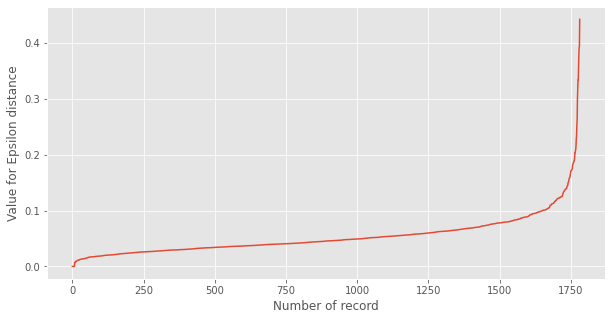

In [ ]:
#code to see the best value using elbow method
plt.figure(figsize=(10,5))
plt.ylabel("Value for Epsilon distance")
plt.xlabel("Number of record")
nn = NearestNeighbors(n_neighbors=5).fit(principalDf)
distances, idx = nn.kneighbors(principalDf)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

**Fiting dataset and implementing DBSCAN using the best parameters**

In [ ]:
db = DBSCAN(eps=0.12,min_samples=7, leaf_size=30, p=2).fit(principalDf)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))- (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(scaled_df1, labels))

Estimated number of clusters: 2
Estimated number of noise points: 174
Silhouette Coefficient: 0.202


**Graphical representation of the data points after the creation of the clusters**

In [ ]:

Scene = dict(xaxis = dict(title  = 'PCA_Financial_Ratio_1'),yaxis = dict(title  = 'PCA_Financial_Ratio_2'),zaxis = dict(title  = 'PCA_Financial_Ratio_3'))
labels = db.labels_
trace = go.Scatter3d(x=principalDf.iloc[:,0], y=principalDf.iloc[:,1], z=principalDf.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title='DBSCAN clusters Derived from PCA', font=dict(size=12,))
fig.show()

In [ ]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = principalDf.index.values
cluster_map['cluster'] = db.labels_

In [ ]:
print(cluster_map[cluster_map.cluster == 1].to_string())

      data_index  cluster
1730        1730        1
1754        1754        1
1764        1764        1
1765        1765        1
1774        1774        1


**Visualization of the data points construction using the financial ratios contribution to get the clusters for fraud and non fraud data before PCA**

In [ ]:
# Setting all variables between 0 and 1 in order to better visualize the results
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(scaled_df1))
df_scaled.columns = scaled_df1.columns
df_scaled['dbscan'] = db.labels_

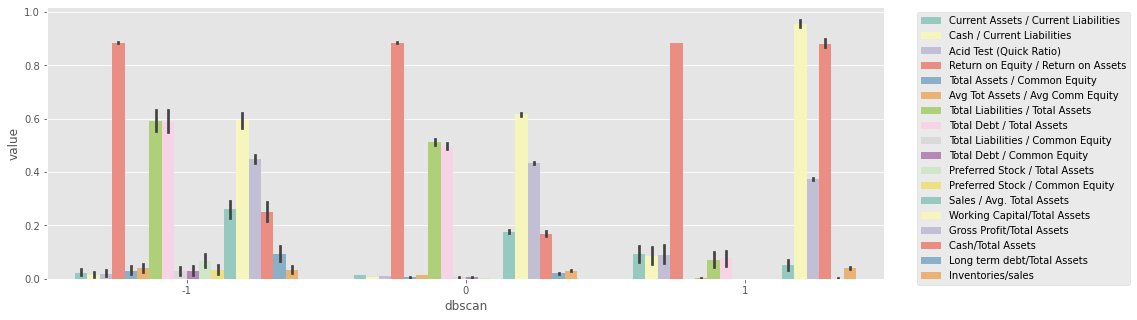

In [ ]:
df['dbscan'] = db.labels_
tidy = df_scaled.melt(id_vars='dbscan')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='dbscan', y='value', hue='variable', data=tidy, palette='Set3')
plt.legend(bbox_to_anchor=(1.30,1),loc ='upper right')
plt.savefig("dbscan_before_PCA.jpg", dpi=300)

**Visualization of the data points construction using the financial ratios contribution to get the clusters for fraud and non fraud data after PCA**

In [ ]:
# Setting all variables between 0 and 1 in order to better visualize the results
scaler = MinMaxScaler()
df_scaled1 = pd.DataFrame(scaler.fit_transform(principalDf))
df_scaled1.columns = principalDf.columns
df_scaled1['dbscan'] = db.labels_

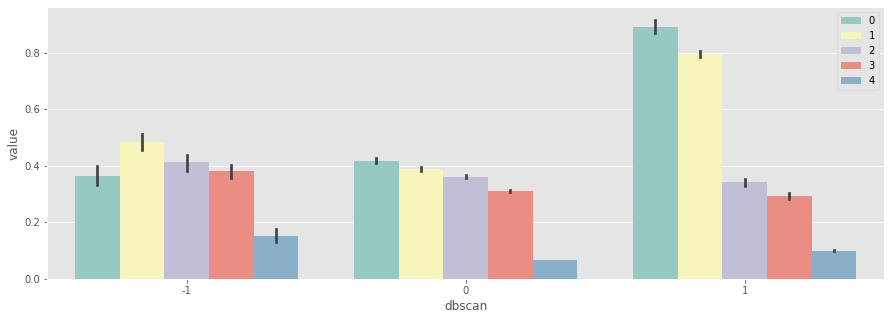

In [ ]:
df['dbscan'] = db.labels_
tidy = df_scaled1.melt(id_vars='dbscan')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='dbscan', y='value', hue='variable', data=tidy, palette='Set3')
plt.legend(loc='upper right')
plt.savefig("dbscan_after_PCA.jpg", dpi=300)

**Submitted To: Professor Dr. Bijan Raahemi<br>
Submitted By: Rahul Raj Sharma<br>
Enrollment number: 300111840**